# 1. Downloading, Installing

In [1]:
import numpy
import matplotlib
import pandas
import sklearn
import random

# 2. Load The Data

### 2.1 Import libraries

In [2]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing


### 2.2 Load Dataset

In [3]:
# Load dataset
dataset = pandas.read_csv("iris.csv")
dataset.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
with open('unshuffled.csv', 'r') as r, open('shuffled.csv', 'w') as w:
    un_data = r.readlines()
    header, rows = un_data[0], un_data[1:]
    random.shuffle(rows)
    rows = '\n'.join([row.strip() for row in rows])
    w.write(header + rows)

In [5]:
Sh_data = pandas.read_csv("shuffled.csv")
Sh_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.4,1.5,0.2,setosa
1,5.3,3.7,1.5,0.2,setosa
2,6.5,3.0,5.5,1.8,virginica
3,6.3,2.3,4.4,1.3,versicolor
4,4.6,3.2,1.4,0.2,setosa
5,5.4,3.7,1.5,0.2,setosa
6,5.7,3.0,4.2,1.2,versicolor
7,5.8,2.7,5.1,1.9,virginica
8,6.8,2.8,4.8,1.4,versicolor
9,5.8,4.0,1.2,0.2,setosa


### 2.2 Processig_Encoding

In [6]:
Sh_data.isnull().sum().sort_values(ascending = False)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
Sh_data['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [8]:
le = preprocessing.LabelEncoder()
Sh_data['species'] = le.fit_transform(Sh_data['species'])
#data.replace()

In [9]:
Sh_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.4,1.5,0.2,0
1,5.3,3.7,1.5,0.2,0
2,6.5,3.0,5.5,1.8,2
3,6.3,2.3,4.4,1.3,1
4,4.6,3.2,1.4,0.2,0
...,...,...,...,...,...
145,6.5,2.8,4.6,1.5,1
146,5.2,3.4,1.4,0.2,0
147,6.2,2.2,4.5,1.5,1
148,4.5,2.3,1.3,0.3,0


### 3.1 Dimensions of Dataset

In [10]:
#Dimensions of Dataset (rows,columns)
# shape
print(Sh_data.shape)

(150, 5)


### 3.2 Peek at the Data

In [11]:
#Peek at the Data
# head
print(Sh_data.head(10))

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.4           1.5          0.2        0
1           5.3          3.7           1.5          0.2        0
2           6.5          3.0           5.5          1.8        2
3           6.3          2.3           4.4          1.3        1
4           4.6          3.2           1.4          0.2        0
5           5.4          3.7           1.5          0.2        0
6           5.7          3.0           4.2          1.2        1
7           5.8          2.7           5.1          1.9        2
8           6.8          2.8           4.8          1.4        1
9           5.8          4.0           1.2          0.2        0


### 3.3 Statistical Summary

In [12]:
#Statistical Summary
#This includes the count, mean, the min and max values as well as some percentiles.
# descriptions
print(Sh_data.describe())

       sepal_length  sepal_width  petal_length  petal_width     species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    1.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000


### 3.4 Class Distribution

In [13]:
# class distribution
# look at the number of instances (rows) that belong to each class
print(Sh_data.groupby('species').size())


species
0    50
1    50
2    50
dtype: int64


# 4. Data Visualization

### 4.1 Univariate Plots

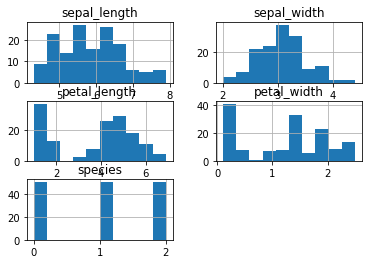

In [14]:
# histograms
Sh_data.hist()
pyplot.show()

### 4.2 Multivariate Plots

# 5. Evaluate Some Algorithms

### 5.1 Create a Validation Dataset

In [15]:
# Splitting data to input and output
data_input = Sh_data.drop('species', axis=1)
data_output = Sh_data['species']
X,X_test,Y,Y_test = train_test_split(data_input,data_output, test_size=0.3, random_state=1)




In [16]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size=0.3, random_state=1)


<AxesSubplot:xlabel='species', ylabel='count'>

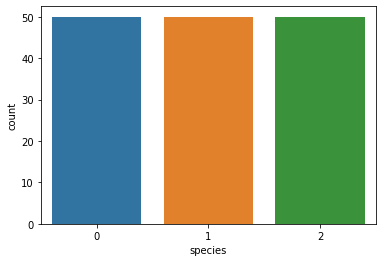

In [17]:
import seaborn as sns
sns.countplot(x = "species",data = Sh_data)

In [18]:
print(X_train.shape)



(73, 4)


In [19]:
#X_train فيها 80 فالميه من التمنين فالميه 
#X_val فيها 20 فالميه من التمنين فالميه 
#X_test فيها 20 فالميه من 100 فالميه 



In [20]:
def model_evaluate(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    return acc_train, acc_val

### 5.2 Build Models

In [21]:
models_list = [
    GaussianNB(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(max_depth=3,min_samples_split=15,splitter='random'),
    SVC(gamma='auto'),
]

In [22]:
results_dict = {
    'model_name': [],
    'acc_train': [],
    'acc_val': [],
}

# for each model
for model in models_list:
    # evaluate the model and calculate acc_train and acc_val
    acc_train, acc_val = model_evaluate(
        model,
        X_train,
        Y_train,
        X_val,
        Y_val
    )
    
    # storing results in results_dict
    results_dict['model_name'].append(model.__class__.__name__)
    results_dict['acc_train'].append(acc_train)
    results_dict['acc_val'].append(acc_val)
    
# converting results_dict to a DataFrame
results_df = pandas.DataFrame(results_dict)
results_df

,model_name,acc_train,acc_val
0,GaussianNB,0.972603,1.0
1,KNeighborsClassifier,0.958904,1.0
2,DecisionTreeClassifier,0.931507,1.0
3,SVC,0.958904,1.0


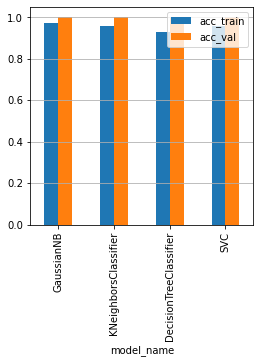

In [23]:
import numpy as np
import matplotlib.pyplot as plt
results_df.plot.bar(x='model_name', y=['acc_train', 'acc_val'], figsize=(4,4))
plt.grid(axis='y')
plt.show()

In [24]:
best_model = DecisionTreeClassifier()
best_model.fit(X_train, Y_train)
y_pred_test = best_model.predict(X_test)
accuracy_score(Y_test, y_pred_test)

0.8888888888888888

### 5.3 Select Best Model

In [25]:


import pandas as pd
cmtx = pd.DataFrame(
    confusion_matrix(Y_test,y_pred_test, labels=['0', '1','2']), 
    index=['true:0', 'true:1','true:2'], 
    columns=['pred:0', 'pred:1','pred:2']
)
print(cmtx)

        pred:0  pred:1  pred:2
true:0       0       0       0
true:1       0       0       0
true:2       0       0       0


In [26]:
import pandas as pd
cmtx = pd.DataFrame(
    confusion_matrix(Y_test, y_pred_test, labels=['setosa', 'versicolor','virginica']), 
    index=['true:setosa', 'true:versicolor','true:virginica'], 
    columns=['pred:setosa', 'pred:versicolor','pred:virginica']
)
print(cmtx)

ValueError: At least one label specified must be in y_true